# Introduction
**Dataset Source**: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

I will be analyzing data on cervical cancer risk factors. The researchers surveyed almost 900 women at the University Hospital of Caracas in Caracas, Venezuela. The dataset includes numerical information such as the age of participants, number of sexual partners, or years using hormonal contraceptives and boolean information such as does the participant smoke, have HPV, or use an IUD. 

I wanted to investigate this topic because as a woman, women's health is important to me. Women with health concerns are often discredited and their concerns ignored. It is all too common to hear stories of women going to their doctor for help and being told they're wrong or overreacting, only to find out later their condition was as serious as they had thought and the doctor was wrong. It is important for women to be aware of behaviors that could be putting them at risk to protect themselves or to be able to recognize when their symptoms could be part of a bigger issue. The sooner a health condition is caught, especially one as serious as cancer, the sooner treatment can begin, and the better odds someone has of recovering. 

In this project, I want to identify the behaviors most closely associated with getting cervical cancer and if there are behaviors when combined, make the risk higher. 

# Methods

In [63]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
rawdata = pd.read_csv('https://raw.githubusercontent.com/gbraga12/DH140-FinalProject/main/cervical_cancer_risk_factors.csv')
data = pd.read_csv('https://raw.githubusercontent.com/gbraga12/DH140-FinalProject/main/cervical_cancer_risk_factors.csv')

To begin my analysis, I had to edit the data from the csv file. The author had used '?' to denote information they did have. These values are not simple to work with so I needed to change them. I attempted to change them to None values, which is recognized by a null value. 

However, I also needed to change all the datatypes to integers. The authors had originally denoted some values as boolean but that did not transfer over to my Jupyter notebook in a way that I could easily use. By turning all the values into integers, it was simple to use the data as I wished. This caused an issue with my None values though. I could not do the data processing I wished to do because I could not figure out how to get around the None values. I tried using .isnull or == None, but nothing I tried would cause the script to ignore the values. 

In the end, I set all the "?" values to zero. I determined that doing so did not change my average values significantly so I decided it was an acceptable assumption. It is important to note that for a few women, the data set will show 0 for their age at their first sexual experience. This is due to my editing. I will ignore these values when I examine that data. 

In [5]:
# Change ? in dataset to Zero
for i in rawdata:
    data.loc[rawdata[i] == '?', i] = 0
    
# Convert at column datatypes into int
columns = data.columns
for j in columns:
    data[j] = pd.to_numeric(data[j])

### Data Information

I utilized data statistics to get a quick overview of the data I was working with and to ensure that the values I was seeing made sense. Before I removed the '?' values and converted everything to integers, much of the information did not show up correctly. It was easy to address these errors when I could see them all laid out in front of me. 

In [25]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.451049,16.856643,2.127040,0.143357,1.201241,0.446278,0.560606,1.972394,0.096737,...,0.508159,0.481352,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.698528,3.183491,1.508108,0.350641,4.060623,2.210351,0.496603,3.597888,0.295771,...,2.388333,2.297125,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on the title of the dataset, "Cervical Cancer Risk Factors", I initially wanted to analyze how the studied behaviors and diagnoses affected the likelihood of developing cervical cancer. However, when looking at the data statistics it can be seen that only about 1% of the patients were diagnosed with CIN and 2% with cancer. That is too small of a population to analyze and draw conclusions from. I decided to pivot my exploration and look at the information that can be attained about STD contraction in general. 

In [26]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Looking at the column headers, you can see the different types of information collected on the patients. Some of the information is behavioral such as how many times the patient has been pregnant or whether or not the patient smokes. Some of the information is health related such as what STDs the patient has been diagnosed with or how many times they've been diagnosed with an STD. I want to relate and draw conclusion from these two types.

# Analysis

### Behaviors vs STD Contraction

The first thing I wanted to delve deeper into was the percentage of women diagnosed with the various STDs the doctors were surveying for. This was done by making a dataset of these values and graphing them on a bar chart so it was easy to tell which were the most common and by how much.

<AxesSubplot: xlabel='STD', ylabel='Percentage of Patients Diagnosed'>

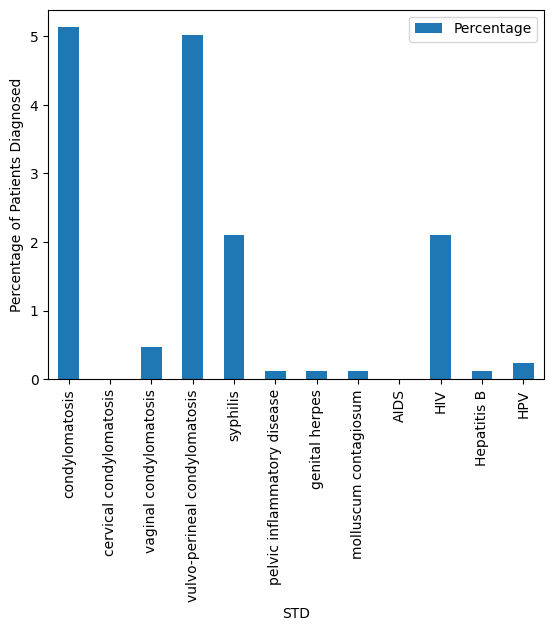

In [170]:
percentages = pd.DataFrame({
              'STD': ['condylomatosis','cervical condylomatosis','vaginal condylomatosis','vulvo-perineal condylomatosis',
                      'syphilis','pelvic inflammatory disease','genital herpes','molluscum contagiosum','AIDS','HIV',
                      'Hepatitis B','HPV'],
              'Percentage': [data.loc[:, 'STDs:condylomatosis'].mean()*100, data.loc[:,'STDs:cervical condylomatosis'].mean()*100,
                             data.loc[:, 'STDs:vaginal condylomatosis'].mean()*100,data.loc[:,'STDs:vulvo-perineal condylomatosis'].mean()*100,
                             data.loc[:, 'STDs:syphilis'].mean()*100,data.loc[:,'STDs:pelvic inflammatory disease'].mean()*100,
                             data.loc[:,'STDs:genital herpes'].mean()*100,data.loc[:,'STDs:molluscum contagiosum'].mean()*100,
                             data.loc[:, 'STDs:AIDS'].mean()*100,data.loc[:,'STDs:HIV'].mean()*100,data.loc[:,'STDs:Hepatitis B'].mean()*100,
                             data.loc[:, 'STDs:HPV'].mean()*100]})

percentages.plot(x = 'STD', y = 'Percentage', kind = 'bar', ylabel = 'Percentage of Patients Diagnosed')

The first factors I wanted to look at is if individual behaviors led to higher or lower rates of STD contraction. I did this by making scatter plots with the frequency of the behaviors I was looking at plotted on the x axis and the number of STD diagnoses on the y axis.  

The first plot I made displayed the relationship between the number of sexual partners a patient had and the number of STDs they had been diagnosed with. The scatter plot shows for people diagnosed with at least one STD, a wide range of sexual partners had been had. Looking at the extremes, the patient who had the most sexual partners, has been diagnosed with no STDS. The patient with the most STDS had an average number of sexual partners. This graph did not give much insightful information. The plot's randomness led me to conclude that the number of sexual partners did not have a significant effect on whether or not a person has an STD. 

<AxesSubplot: xlabel='Number of sexual partners', ylabel='STDs (number)'>

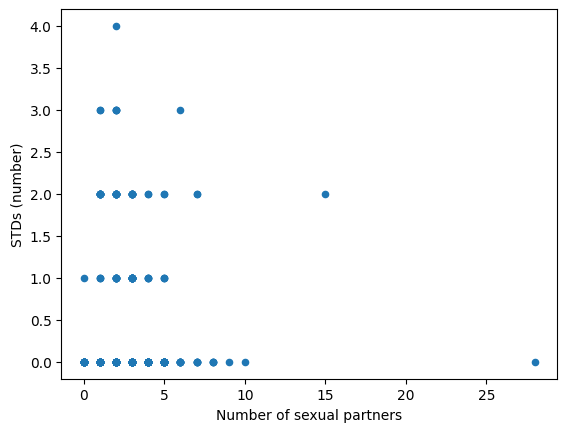

In [143]:
data.plot(x = 'Number of sexual partners', y = 'STDs (number)', kind = 'scatter')

To look more in depth at this, I grouped all the patients with the same number of diagnosed STDs and calculated their mean number of sexual partners, as can be seen below. The averages are all very close. Their closeness is supported by the significantly small standard deviation.

In [154]:
four = 0
three = 0
two = 0
one = 0
zero = 0

fourc = 0
threec = 0
twoc = 0
onec = 0
zeroc = 0

for i in range(data.shape[0]):
    if data.loc[i,'STDs (number)'] == 0:
        zero += data.loc[i,'Number of sexual partners']
        zeroc += 1
    if data.loc[i,'STDs (number)'] == 1:
        one += data.loc[i,'Number of sexual partners']
        onec += 1
    if data.loc[i,'STDs (number)'] == 2:
        two += data.loc[i,'Number of sexual partners']
        twoc += 1
    if data.loc[i,'STDs (number)'] == 3:
        three += data.loc[i,'Number of sexual partners']
        threec += 1
    if data.loc[i,'STDs (number)'] == 4:
        four += data.loc[i,'Number of sexual partners']
        fourc += 1

print("Average # of sexual partners, zero STDs  =", zero/zeroc)
print("Average # of sexual partners, one STD    =", one/onec)
print("Average # of sexual partners, two STDs   =", two/twoc)
print("Average # of sexual partners, three STDs =", three/threec)
print("Average # of sexual partners, four STDs  =", four/fourc)
print("Standard deviation of averages = ", st.stdev([zero/zeroc,one/onec,two/twoc,three/threec,four/fourc]))


Average # of sexual partners, zero STDs  = 2.418485237483954
Average # of sexual partners, one STD    = 2.7941176470588234
Average # of sexual partners, two STDs   = 2.864864864864865
Average # of sexual partners, three STDs = 2.2857142857142856
Average # of sexual partners, four STDs  = 2.0
Standard deviation of averages =  0.360017622025848


I then looked at the relationship between the age of the patient at the time of their first sexual experience and the number of STDs the patient had. An extra step was taken to ensure my edited data did not affect the graph. Similar to above, the graph seems random. Regardless of how many STDs the patients have been diagnosed with, the average age is similar.

<AxesSubplot: xlabel='First sexual intercourse', ylabel='STDs (number)'>

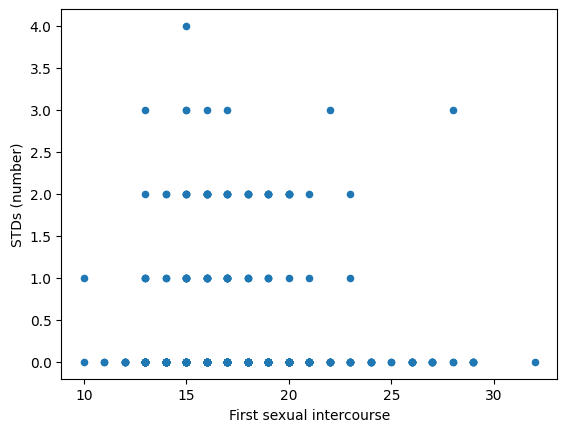

In [18]:
trunc_data = data.loc[(data['First sexual intercourse'] > 0.0)]
trunc_data.plot(x = 'First sexual intercourse', y = 'STDs (number)', kind = 'scatter')

### Risks vs Testing

After not forming a strong relationship between the behaviors and STDs, I decided to examine a relationship between the various risks and if a test fro cervical cancer was performed on the patient. First, I looked at what STDs patients who had biopsies were diagnosed with and compared it to the rate of diagnoses of patients who did not undergo a biopsy. To display this information I made a bar chart similar to the one I made earlier, where the x axis shows the various STDs and the y axis shows the percentage. From the graphic, it can be seen that patients who underwent biopsies had significantly higher rates of condylomatosis, vulvo-perineal condylomatosis, and HIV. These can be noted as risks for cervical cancer based on that graphic.

In [19]:
biopsydata = data.loc[(data['Biopsy']==1)]
nobiopsydata = data.loc[(data['Biopsy']==0)]

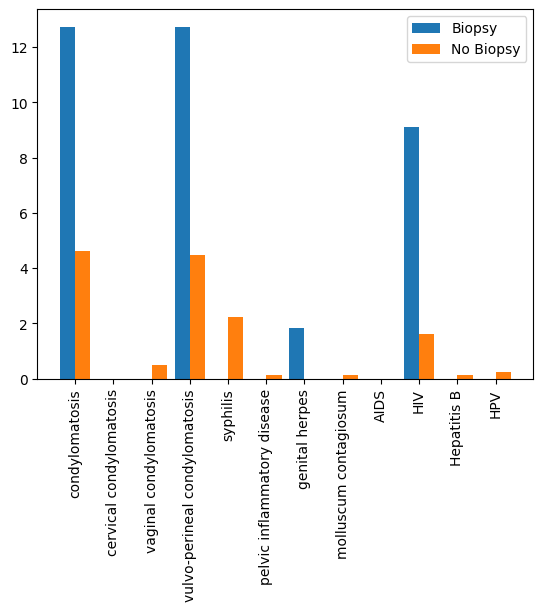

In [43]:
biopsystdpercentages = pd.DataFrame({
              'STD': ['condylomatosis','cervical condylomatosis','vaginal condylomatosis','vulvo-perineal condylomatosis',
                      'syphilis','pelvic inflammatory disease','genital herpes','molluscum contagiosum','AIDS','HIV',
                      'Hepatitis B','HPV'],
              'Percentage': [biopsydata.loc[:, 'STDs:condylomatosis'].mean()*100, biopsydata.loc[:,'STDs:cervical condylomatosis'].mean()*100,
                             biopsydata.loc[:, 'STDs:vaginal condylomatosis'].mean()*100,biopsydata.loc[:,'STDs:vulvo-perineal condylomatosis'].mean()*100,
                             biopsydata.loc[:, 'STDs:syphilis'].mean()*100,biopsydata.loc[:,'STDs:pelvic inflammatory disease'].mean()*100,
                             biopsydata.loc[:,'STDs:genital herpes'].mean()*100,biopsydata.loc[:,'STDs:molluscum contagiosum'].mean()*100,
                             biopsydata.loc[:, 'STDs:AIDS'].mean()*100,biopsydata.loc[:,'STDs:HIV'].mean()*100,biopsydata.loc[:,'STDs:Hepatitis B'].mean()*100,
                             biopsydata.loc[:, 'STDs:HPV'].mean()*100]})
nobiopsystdpercentages = pd.DataFrame({
              'STD': ['condylomatosis','cervical condylomatosis','vaginal condylomatosis','vulvo-perineal condylomatosis',
                      'syphilis','pelvic inflammatory disease','genital herpes','molluscum contagiosum','AIDS','HIV',
                      'Hepatitis B','HPV'],
              'Percentage': [nobiopsydata.loc[:, 'STDs:condylomatosis'].mean()*100, nobiopsydata.loc[:,'STDs:cervical condylomatosis'].mean()*100,
                             nobiopsydata.loc[:, 'STDs:vaginal condylomatosis'].mean()*100,nobiopsydata.loc[:,'STDs:vulvo-perineal condylomatosis'].mean()*100,
                             nobiopsydata.loc[:, 'STDs:syphilis'].mean()*100,nobiopsydata.loc[:,'STDs:pelvic inflammatory disease'].mean()*100,
                             nobiopsydata.loc[:,'STDs:genital herpes'].mean()*100,nobiopsydata.loc[:,'STDs:molluscum contagiosum'].mean()*100,
                             nobiopsydata.loc[:, 'STDs:AIDS'].mean()*100,nobiopsydata.loc[:,'STDs:HIV'].mean()*100,nobiopsydata.loc[:,'STDs:Hepatitis B'].mean()*100,
                             nobiopsydata.loc[:, 'STDs:HPV'].mean()*100]})

fig = plt.figure()
X_axis = np.arange(biopsystdpercentages.shape[0])

plt.bar(X_axis - 0.2, biopsystdpercentages['Percentage'], 0.4, label = 'Biopsy')
plt.bar(X_axis + 0.2, nobiopsystdpercentages['Percentage'], 0.4, label = 'No Biopsy')
plt.xticks(X_axis, biopsystdpercentages['STD'])
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.show()


Next, I wanted to perform an analysis, similar to the first except on the demographic information the patients. The bar chart shows the average values for each to be fairly similar. The average age for the group that underwent a biopsy is slightly higher, which makes sense because in general, people care about their health more as they're older. Besides this slight discrepancy, the values are so close that it appears none of these factors influence the risk for cervical cancer.

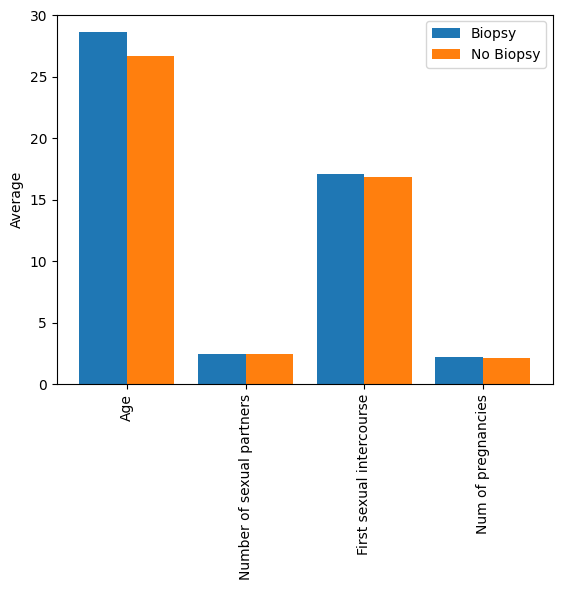

In [47]:

biopsydemopercentages = pd.DataFrame({
              'Experience': ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies'],
              'Average': [biopsydata.loc[:, 'Age'].mean(), biopsydata.loc[:,'Number of sexual partners'].mean(),
                             biopsydata.loc[:, 'First sexual intercourse'].mean(),biopsydata.loc[:,'Num of pregnancies'].mean()]})
nobiopsydemopercentages = pd.DataFrame({
              'Experience': ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies'],
              'Average': [nobiopsydata.loc[:, 'Age'].mean(), nobiopsydata.loc[:,'Number of sexual partners'].mean(),
                             nobiopsydata.loc[:, 'First sexual intercourse'].mean(),nobiopsydata.loc[:,'Num of pregnancies'].mean()]})

fig = plt.figure()
X_axis = np.arange(biopsydemopercentages.shape[0])

plt.bar(X_axis - 0.2, biopsydemopercentages['Average'], 0.4, label = 'Biopsy')
plt.bar(X_axis + 0.2, nobiopsydemopercentages['Average'], 0.4, label = 'No Biopsy')
plt.xticks(X_axis, biopsydemopercentages['Experience'])
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.ylabel('Average')
plt.show()



Next I looked at some of the behavior differences between patients biopsied and not. From this bar chart, some interesting variance can be seen. The group that was biopsied has higher rates of smoking, using birth control (hormonal or IUD), and STDs. The higher rates of smoking and STDs made sense because both of these lead to poorer health for the patient, putting them at a greater risk for getting sick. I was surprised however by such a significant difference in rates of birth control usage, I expected to see no difference.

These findings however were supported by the American Cancer Society and an article on WebMD. In an article by Kelli Miller, it is stated that taking oral contraceptives, which are hormonal, will decrease the risk of endometrial cancer and ovarian cancer, but could increase the risk of breast cancer and cervical cancer. This was shocking to read because I had never heard that discussed. Although I am not taking oral contraceptives, I do use hormonal birth control and that risk is not something I had ever had explained to me. It is important that information like this is known so that patients, especially ones that already are at higher risk for cervical cancer, know all the effects of their medication.  

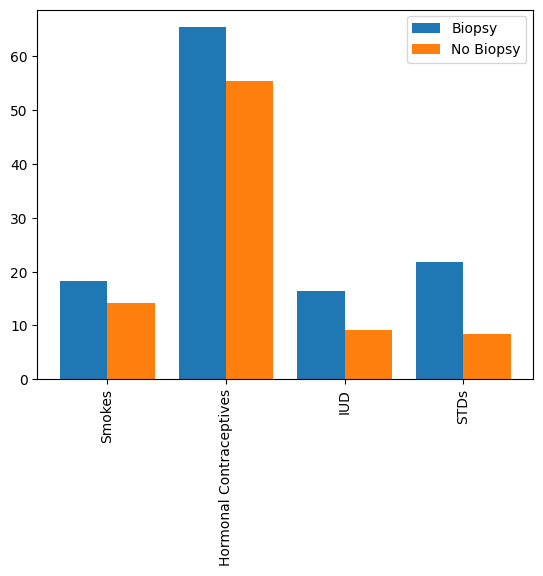

In [62]:
biopsybhrpercentages = pd.DataFrame({
              'Behavior': ['Smokes','Hormonal Contraceptives','IUD','STDs'],
              'Percentage': [biopsydata.loc[:, 'Smokes'].mean()*100,biopsydata.loc[:,'Hormonal Contraceptives'].mean()*100,
                             biopsydata.loc[:,'IUD'].mean()*100,biopsydata.loc[:,'STDs'].mean()*100]})
nobiopsybhrpercentages = pd.DataFrame({
              'Behavior': ['Smokes','Hormonal Contraceptives','IUD','STDs'],
              'Percentage': [nobiopsydata.loc[:, 'Smokes'].mean()*100,nobiopsydata.loc[:,'Hormonal Contraceptives'].mean()*100,
                             nobiopsydata.loc[:,'IUD'].mean()*100,nobiopsydata.loc[:,'STDs'].mean()*100]})

fig = plt.figure()
X_axis = np.arange(biopsybhrpercentages.shape[0])

plt.bar(X_axis - 0.2, biopsybhrpercentages['Percentage'], 0.4, label = 'Biopsy')
plt.bar(X_axis + 0.2, nobiopsybhrpercentages['Percentage'], 0.4, label = 'No Biopsy')
plt.xticks(X_axis, biopsybhrpercentages['Behavior'])
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.show()

To be thorough in my exploration of what risks lead to doctors checking for cervical cancer, I compared patients who underwent other tests for cervical cancer with patients who did not. These other tests are the Hinselmann test and the Schiller test. The results from the data analysis for these two tests supports the conclusions I came to after looking at the biopsy data. The bar charts that display this data are all below.

In [50]:
Hinselmanndata = data.loc[(data['Hinselmann']==1)]
noHinselmanndata = data.loc[(data['Hinselmann']==0)]

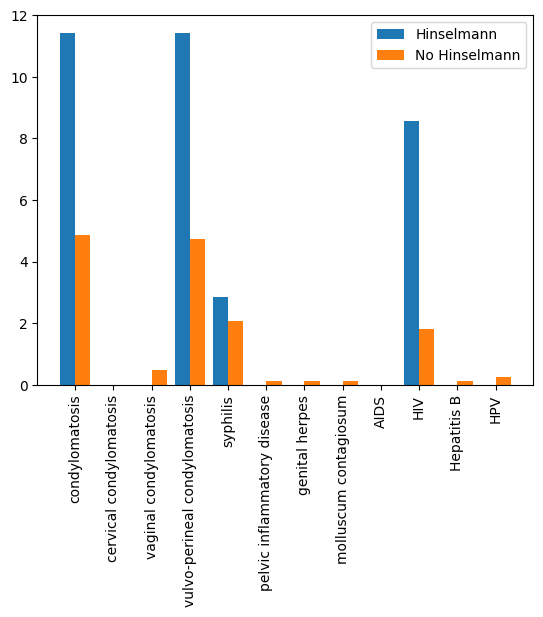

In [53]:
Hinselmannstdpercentages = pd.DataFrame({
              'STD': ['condylomatosis','cervical condylomatosis','vaginal condylomatosis','vulvo-perineal condylomatosis',
                      'syphilis','pelvic inflammatory disease','genital herpes','molluscum contagiosum','AIDS','HIV',
                      'Hepatitis B','HPV'],
              'Percentage': [Hinselmanndata.loc[:, 'STDs:condylomatosis'].mean()*100, Hinselmanndata.loc[:,'STDs:cervical condylomatosis'].mean()*100,
                             Hinselmanndata.loc[:, 'STDs:vaginal condylomatosis'].mean()*100,Hinselmanndata.loc[:,'STDs:vulvo-perineal condylomatosis'].mean()*100,
                             Hinselmanndata.loc[:, 'STDs:syphilis'].mean()*100,Hinselmanndata.loc[:,'STDs:pelvic inflammatory disease'].mean()*100,
                             Hinselmanndata.loc[:,'STDs:genital herpes'].mean()*100,Hinselmanndata.loc[:,'STDs:molluscum contagiosum'].mean()*100,
                             Hinselmanndata.loc[:, 'STDs:AIDS'].mean()*100,Hinselmanndata.loc[:,'STDs:HIV'].mean()*100,Hinselmanndata.loc[:,'STDs:Hepatitis B'].mean()*100,
                             Hinselmanndata.loc[:, 'STDs:HPV'].mean()*100]})
noHinselmannstdpercentages = pd.DataFrame({
              'STD': ['condylomatosis','cervical condylomatosis','vaginal condylomatosis','vulvo-perineal condylomatosis',
                      'syphilis','pelvic inflammatory disease','genital herpes','molluscum contagiosum','AIDS','HIV',
                      'Hepatitis B','HPV'],
              'Percentage': [noHinselmanndata.loc[:, 'STDs:condylomatosis'].mean()*100, noHinselmanndata.loc[:,'STDs:cervical condylomatosis'].mean()*100,
                             noHinselmanndata.loc[:, 'STDs:vaginal condylomatosis'].mean()*100,noHinselmanndata.loc[:,'STDs:vulvo-perineal condylomatosis'].mean()*100,
                             noHinselmanndata.loc[:, 'STDs:syphilis'].mean()*100,noHinselmanndata.loc[:,'STDs:pelvic inflammatory disease'].mean()*100,
                             noHinselmanndata.loc[:,'STDs:genital herpes'].mean()*100,noHinselmanndata.loc[:,'STDs:molluscum contagiosum'].mean()*100,
                             noHinselmanndata.loc[:, 'STDs:AIDS'].mean()*100,noHinselmanndata.loc[:,'STDs:HIV'].mean()*100,noHinselmanndata.loc[:,'STDs:Hepatitis B'].mean()*100,
                             noHinselmanndata.loc[:, 'STDs:HPV'].mean()*100]})

fig = plt.figure()
X_axis = np.arange(Hinselmannstdpercentages.shape[0])

plt.bar(X_axis - 0.2, Hinselmannstdpercentages['Percentage'], 0.4, label = 'Hinselmann')
plt.bar(X_axis + 0.2, noHinselmannstdpercentages['Percentage'], 0.4, label = 'No Hinselmann')
plt.xticks(X_axis, Hinselmannstdpercentages['STD'])
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.show()


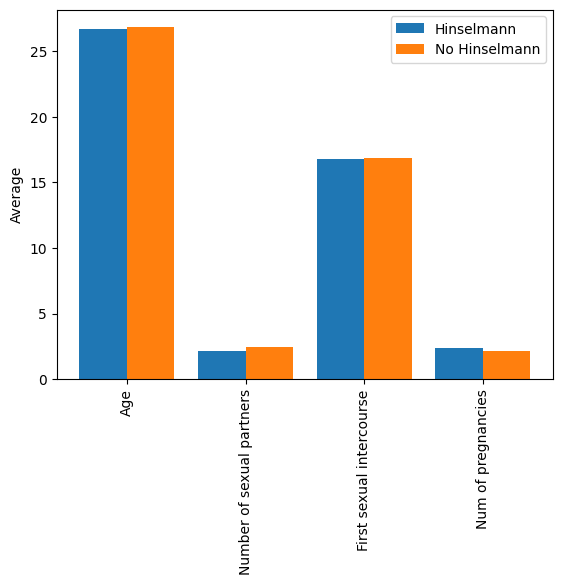

In [54]:

Hinselmanndemopercentages = pd.DataFrame({
              'Experience': ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies'],
              'Average': [Hinselmanndata.loc[:, 'Age'].mean(), Hinselmanndata.loc[:,'Number of sexual partners'].mean(),
                             Hinselmanndata.loc[:, 'First sexual intercourse'].mean(),Hinselmanndata.loc[:,'Num of pregnancies'].mean()]})
noHinselmanndemopercentages = pd.DataFrame({
              'Experience': ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies'],
              'Average': [noHinselmanndata.loc[:, 'Age'].mean(), noHinselmanndata.loc[:,'Number of sexual partners'].mean(),
                             noHinselmanndata.loc[:, 'First sexual intercourse'].mean(),noHinselmanndata.loc[:,'Num of pregnancies'].mean()]})

fig = plt.figure()
X_axis = np.arange(Hinselmanndemopercentages.shape[0])

plt.bar(X_axis - 0.2, Hinselmanndemopercentages['Average'], 0.4, label = 'Hinselmann')
plt.bar(X_axis + 0.2, noHinselmanndemopercentages['Average'], 0.4, label = 'No Hinselmann')
plt.xticks(X_axis, Hinselmanndemopercentages['Experience'])
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.ylabel('Average')
plt.show()



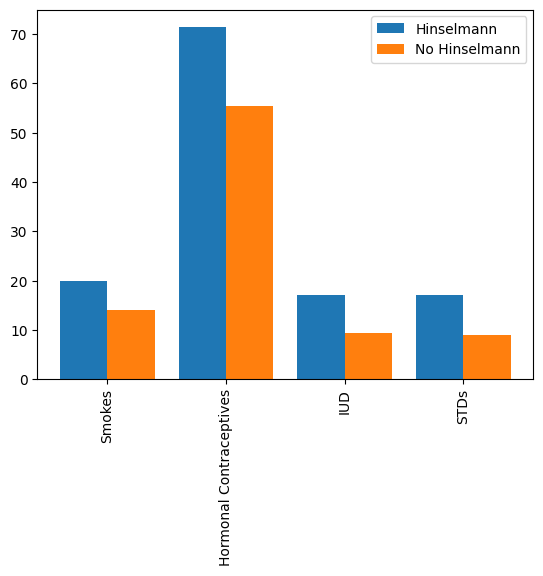

In [55]:
Hinselmannbhrpercentages = pd.DataFrame({
              'Behavior': ['Smokes','Hormonal Contraceptives','IUD','STDs'],
              'Percentage': [Hinselmanndata.loc[:, 'Smokes'].mean()*100,Hinselmanndata.loc[:,'Hormonal Contraceptives'].mean()*100,
                             Hinselmanndata.loc[:,'IUD'].mean()*100,Hinselmanndata.loc[:,'STDs'].mean()*100]})
noHinselmannbhrpercentages = pd.DataFrame({
              'Behavior': ['Smokes','Hormonal Contraceptives','IUD','STDs'],
              'Percentage': [noHinselmanndata.loc[:, 'Smokes'].mean()*100,noHinselmanndata.loc[:,'Hormonal Contraceptives'].mean()*100,
                             noHinselmanndata.loc[:,'IUD'].mean()*100,noHinselmanndata.loc[:,'STDs'].mean()*100]})

fig = plt.figure()
X_axis = np.arange(Hinselmannbhrpercentages.shape[0])

plt.bar(X_axis - 0.2, Hinselmannbhrpercentages['Percentage'], 0.4, label = 'Hinselmann')
plt.bar(X_axis + 0.2, noHinselmannbhrpercentages['Percentage'], 0.4, label = 'No Hinselmann')
plt.xticks(X_axis, Hinselmannbhrpercentages['Behavior'])
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.show()

In [56]:
Schillerdata = data.loc[(data['Schiller']==1)]
noSchillerdata = data.loc[(data['Schiller']==0)]

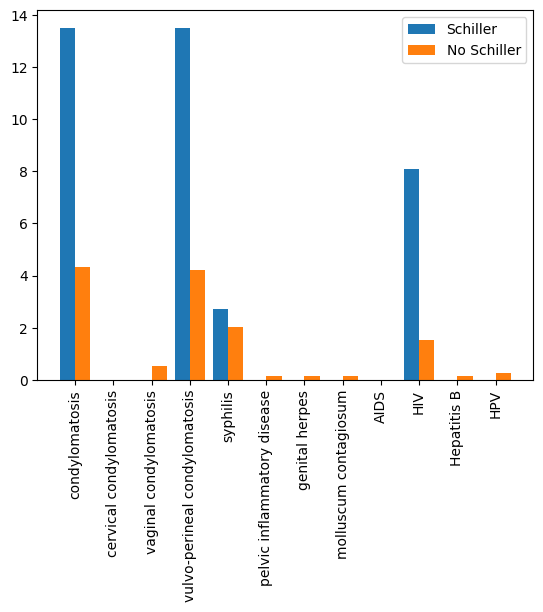

In [59]:
Schillerstdpercentages = pd.DataFrame({
              'STD': ['condylomatosis','cervical condylomatosis','vaginal condylomatosis','vulvo-perineal condylomatosis',
                      'syphilis','pelvic inflammatory disease','genital herpes','molluscum contagiosum','AIDS','HIV',
                      'Hepatitis B','HPV'],
              'Percentage': [Schillerdata.loc[:, 'STDs:condylomatosis'].mean()*100, Schillerdata.loc[:,'STDs:cervical condylomatosis'].mean()*100,
                             Schillerdata.loc[:, 'STDs:vaginal condylomatosis'].mean()*100,Schillerdata.loc[:,'STDs:vulvo-perineal condylomatosis'].mean()*100,
                             Schillerdata.loc[:, 'STDs:syphilis'].mean()*100,Schillerdata.loc[:,'STDs:pelvic inflammatory disease'].mean()*100,
                             Schillerdata.loc[:,'STDs:genital herpes'].mean()*100,Schillerdata.loc[:,'STDs:molluscum contagiosum'].mean()*100,
                             Schillerdata.loc[:, 'STDs:AIDS'].mean()*100,Schillerdata.loc[:,'STDs:HIV'].mean()*100,Schillerdata.loc[:,'STDs:Hepatitis B'].mean()*100,
                             Schillerdata.loc[:, 'STDs:HPV'].mean()*100]})
noSchillerstdpercentages = pd.DataFrame({
              'STD': ['condylomatosis','cervical condylomatosis','vaginal condylomatosis','vulvo-perineal condylomatosis',
                      'syphilis','pelvic inflammatory disease','genital herpes','molluscum contagiosum','AIDS','HIV',
                      'Hepatitis B','HPV'],
              'Percentage': [noSchillerdata.loc[:, 'STDs:condylomatosis'].mean()*100, noSchillerdata.loc[:,'STDs:cervical condylomatosis'].mean()*100,
                             noSchillerdata.loc[:, 'STDs:vaginal condylomatosis'].mean()*100,noSchillerdata.loc[:,'STDs:vulvo-perineal condylomatosis'].mean()*100,
                             noSchillerdata.loc[:, 'STDs:syphilis'].mean()*100,noSchillerdata.loc[:,'STDs:pelvic inflammatory disease'].mean()*100,
                             noSchillerdata.loc[:,'STDs:genital herpes'].mean()*100,noSchillerdata.loc[:,'STDs:molluscum contagiosum'].mean()*100,
                             noSchillerdata.loc[:, 'STDs:AIDS'].mean()*100,noSchillerdata.loc[:,'STDs:HIV'].mean()*100,noSchillerdata.loc[:,'STDs:Hepatitis B'].mean()*100,
                             noSchillerdata.loc[:, 'STDs:HPV'].mean()*100]})

fig = plt.figure()
X_axis = np.arange(Schillerstdpercentages.shape[0])

plt.bar(X_axis - 0.2, Schillerstdpercentages['Percentage'], 0.4, label = 'Schiller')
plt.bar(X_axis + 0.2, noSchillerstdpercentages['Percentage'], 0.4, label = 'No Schiller')
plt.xticks(X_axis, Schillerstdpercentages['STD'])
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.show()


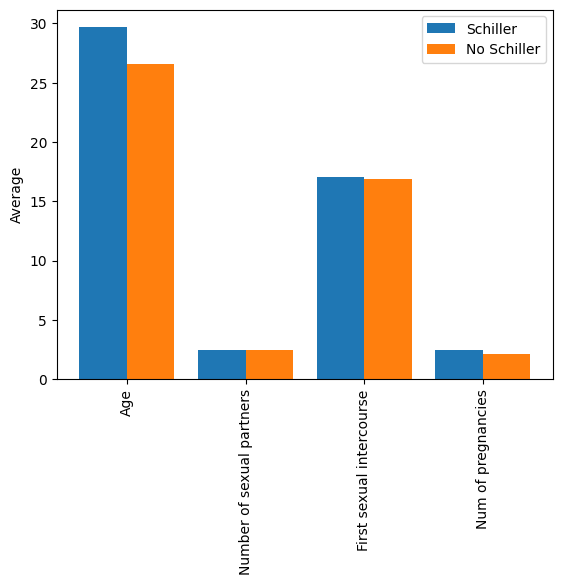

In [61]:

Schillerdemopercentages = pd.DataFrame({
              'Experience': ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies'],
              'Average': [Schillerdata.loc[:, 'Age'].mean(), Schillerdata.loc[:,'Number of sexual partners'].mean(),
                          Schillerdata.loc[:, 'First sexual intercourse'].mean(),Schillerdata.loc[:,'Num of pregnancies'].mean()]})
noSchillerdemopercentages = pd.DataFrame({
              'Experience': ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies'],
              'Average': [noSchillerdata.loc[:, 'Age'].mean(), noSchillerdata.loc[:,'Number of sexual partners'].mean(),
                             noSchillerdata.loc[:, 'First sexual intercourse'].mean(),noSchillerdata.loc[:,'Num of pregnancies'].mean()]})

fig = plt.figure()
X_axis = np.arange(Schillerdemopercentages.shape[0])

plt.bar(X_axis - 0.2, Schillerdemopercentages['Average'], 0.4, label = 'Schiller')
plt.bar(X_axis + 0.2, noSchillerdemopercentages['Average'], 0.4, label = 'No Schiller')
plt.xticks(X_axis, Schillerdemopercentages['Experience'])
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.ylabel('Average')
plt.show()



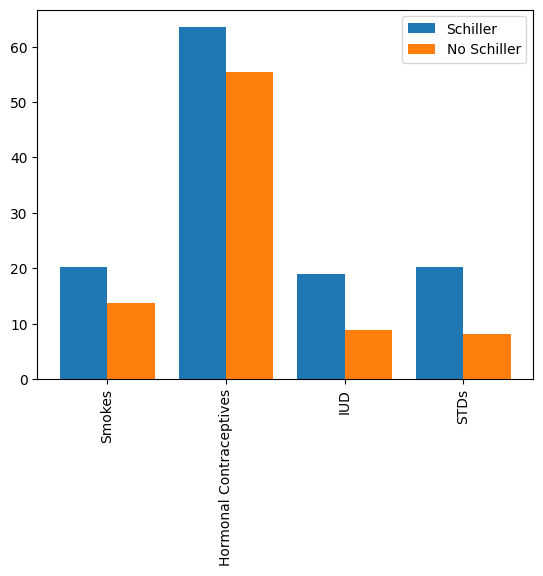

In [60]:
Schillerbhrpercentages = pd.DataFrame({
              'Behavior': ['Smokes','Hormonal Contraceptives','IUD','STDs'],
              'Percentage': [Schillerdata.loc[:, 'Smokes'].mean()*100,Schillerdata.loc[:,'Hormonal Contraceptives'].mean()*100,
                             Schillerdata.loc[:,'IUD'].mean()*100,Schillerdata.loc[:,'STDs'].mean()*100]})
noSchillerbhrpercentages = pd.DataFrame({
              'Behavior': ['Smokes','Hormonal Contraceptives','IUD','STDs'],
              'Percentage': [noSchillerdata.loc[:, 'Smokes'].mean()*100,noSchillerdata.loc[:,'Hormonal Contraceptives'].mean()*100,
                             noSchillerdata.loc[:,'IUD'].mean()*100,noSchillerdata.loc[:,'STDs'].mean()*100]})

fig = plt.figure()
X_axis = np.arange(Schillerbhrpercentages.shape[0])

plt.bar(X_axis - 0.2, Schillerbhrpercentages['Percentage'], 0.4, label = 'Schiller')
plt.bar(X_axis + 0.2, noSchillerbhrpercentages['Percentage'], 0.4, label = 'No Schiller')
plt.xticks(X_axis, Schillerbhrpercentages['Behavior'])
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.show()

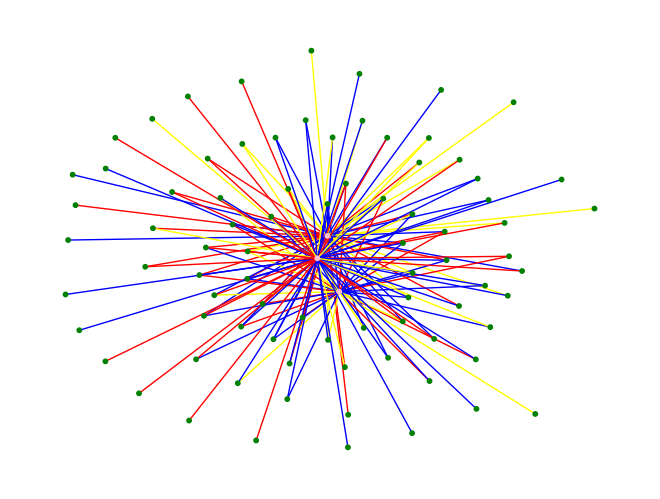

In [66]:
G = nx.Graph()

G.add_node('Biopsy')
G.add_node('Hinselmann')
G.add_node('Schiller')

edgecolors = []

for i in range(data.shape[0]):
    if data.loc[i,'Biopsy']:
        G.add_node(i)
        G.add_edge(i, 'Biopsy')
        edgecolors.append('red')
    if data.loc[i,'Hinselmann']:
        G.add_node(i)
        G.add_edge(i, 'Hinselmann')
        edgecolors.append('yellow')
    if data.loc[i,'Schiller']:
        G.add_node(i)
        G.add_edge(i, 'Schiller')
        edgecolors.append('blue')
        
nodecolors = []

for i in range(len(G.nodes)):
    if i > 2:
        nodecolors.append('green')
    else:
        nodecolors.append('pink')
        
nx.draw(G, edge_color = edgecolors, node_size = 10, node_color = nodecolors)

# Results

Throughout my research, I did not find much correlation between behaviors and risk for STDs. This was surprising for me. For example, I expected to see positive correlation between the number of sexual partners someone has and the number of STDs someone is diagnosed with. I assumed the more sexual encounters one has, the more diseases one is exposed to, the more STDs one will contract, similar to the more someone drives, the more likely they are to get into a car accident, no matter how good of a driver they are. 

The lack of correlations could be due to the limited demographic surveyed by the researchers. All the data was collected at one hospital, in a brief time period. The sample size does seem large enough to capture a complete range of responses. Another possible source of error is the data collection relies on self reporting. Sexual behaviors and sexually transmitted diseases are highly taboo subjects, survey respondents may not feel entirely comfortable reporting this kind of information about themselves and could alter the truth. If subjects volunteer to participate, there is also a particular type of person that is going to be willing to answer questions about their sexual history and this might skew the type of responses received.

A final source of error may be that I do not have the resources or experience to process the data sufficiently. I unfortunately have not taken any statistics classes so my knowledge limits my ability to perform analysis. I researched different methods of evaluating correlation and attempted to apply them but they either didn't yield any noteworthy information, or I was applying them wrong. 

From the analysis I performed, I conclude that there is no clear relationship between the behaviors surveyed and the risk for STDs. 